In [29]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [30]:
annFile='annotations/instances_train2014.json'

In [31]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=6.67s)
creating index...
index created!


In [32]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture person outdoor food electronic appliance indoor animal sports kitchen accessory vehicle


In [39]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['bottle']);
imgIds = coco.getImgIds(catIds=catIds );
print (imgIds)
#imgIds = coco.getImgIds(imgIds = [324158])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]['coco_url']
for i in imgIds:
    print (i)
    img = coco.loadImgs(i)[0]['coco_url']
    I =io.imread(img)
    cv2.imwrite('extracted_image/'+ str(i)+'.jpg', I[:,:,::-1])
    
'''I = io.imread(img)
print (I.shape)
cv2.imwrite('extracted_image/bottle.jpg', I[:,:,::-1])
plt.imshow(I)'''

[98304, 229378, 294920, 557065, 557081, 294942, 327717, 131113, 393268, 65601, 458821, 393291, 163917, 65616, 131162, 557155, 131172, 557174, 32893, 163965, 229511, 32903, 142, 426128, 557205, 229525, 393375, 327843, 426149, 196773, 98480, 524467, 458935, 360637, 524486, 262359, 491737, 229596, 295154, 426246, 459018, 33042, 33057, 196899, 557355, 65836, 131374, 426300, 65855, 98629, 33094, 524645, 164200, 524649, 360811, 196971, 491888, 262529, 33156, 98694, 393608, 197005, 295317, 360855, 360868, 360870, 131498, 557490, 65979, 98748, 360896, 229825, 557508, 426445, 197069, 131547, 295394, 295399, 33262, 229875, 164339, 66041, 131595, 426513, 492078, 426548, 426551, 459319, 557628, 393795, 229962, 66129, 164435, 98904, 295524, 197221, 131697, 262770, 66166, 230007, 492151, 98944, 643, 164485, 197264, 492183, 164534, 295613, 426690, 328391, 557768, 714, 492236, 99030, 328407, 328427, 426733, 754, 361205, 557825, 99073, 790, 66328, 197407, 33571, 262954, 262962, 394036, 459576, 131909, 

229378
294920
557065
557081
294942
327717
131113
393268
65601
458821
393291
163917
65616
131162
557155
131172
557174
32893
163965
229511
32903
142
426128
557205
229525
393375
327843
426149
196773
98480
524467
458935
360637
524486
262359
491737
229596
295154
426246
459018
33042
33057
196899
557355
65836
131374
426300
65855
98629
33094
524645
164200
524649
360811
196971
491888
262529
33156
98694
393608
197005
295317
360855
360868
360870
131498
557490
65979
98748
360896
229825
557508
426445
197069
131547
295394
295399
33262
229875
164339
66041
131595
426513
492078
426548
426551
459319
557628
393795
229962
66129
164435
98904
295524
197221
131697
262770
66166
230007
492151
98944
643
164485
197264
492183
164534
295613
426690
328391
557768
714
492236
99030
328407
328427
426733
754
361205
557825
99073
790
66328
197407
33571
262954
262962
394036
459576
131909
426831
164691
262997
131927
99159
66406
164725
426869
525176
328571
525180
263041
492417
394115
328582
459659
909
361361
295836
525218
36

39236
563525
170308
170312
432461
334162
334187
334197
268668
432510
334220
530832
203163
6572
104879
104891
563652
203208
563659
498125
465359
137681
563676
465374
399841
399862
203273
367125
530966
39446
301591
498204
563743
72229
465457
137788
301631
367177
236111
563793
6747
236125
236126
268901
39548
334470
334476
236176
39588
367280
72373
6842
137918
301764
498372
236243
301783
465625
498403
236260
72421
203492
39654
105192
72435
432890
334587
269054
334616
236318
138025
334637
236340
72505
432956
465734
138064
203601
72531
72538
203611
236386
432997
432998
236397
334714
170877
72575
138117
72595
564118
72605
39846
72615
433063
105388
170929
72626
334777
302019
170952
433101
334798
170962
236515
302055
302065
400377
105470
465922
7179
302103
531481
400417
498722
105520
7220
269364
105531
564288
203843
302147
105546
72792
203867
498786
105576
72809
367725
72817
72821
40056
269434
498815
466058
367758
433296
138385
302230
7318
7319
302240
72866
335013
72872
302249
367786
367795
269

406295
406298
504606
45854
471851
439084
242484
537422
13140
13144
537441
406375
144246
471935
209794
275339
340877
471952
406420
308121
570280
308139
45999
111543
111549
177088
373697
177090
13252
439241
537555
275413
406490
373729
13283
144358
406509
144371
340983
46071
177150
46078
209920
144388
46090
570385
308251
439325
111646
504861
177193
242731
570412
144431
537648
144436
275511
78909
308297
504907
341070
144467
46168
570457
111705
537689
177245
111737
46223
439439
570518
570522
275612
210077
537761
472226
210082
537774
144560
46260
406710
439479
210104
406716
144580
242885
308432
373970
439506
570581
144599
275672
341218
406755
570608
406772
537844
275708
210187
341271
505111
13595
341275
13603
242982
341286
111933
505152
111943
243019
243021
275795
341335
308575
505188
13675
308592
210296
472452
79236
210322
505234
13720
46492
79262
79269
341437
210368
472519
308686
79313
341459
505309
243173
472552
472553
275961
538108
570876
275969
538116
374288
308758
570917
144937
472617


KeyboardInterrupt: 

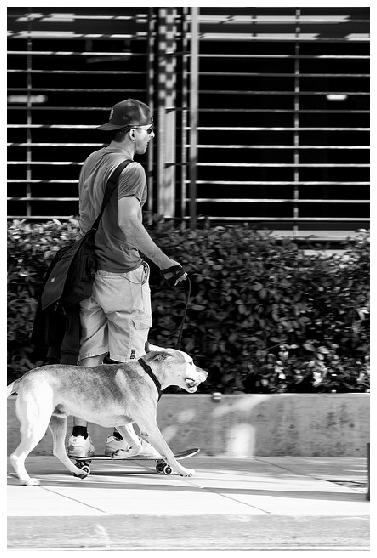

In [9]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

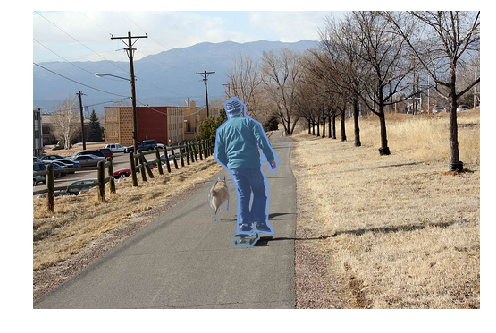

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


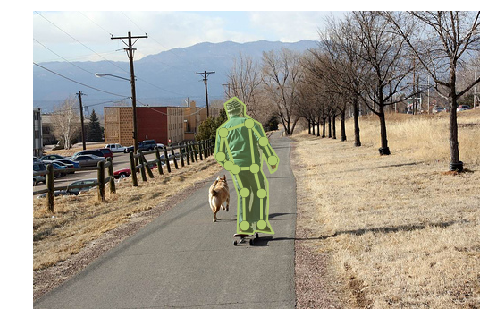

In [9]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


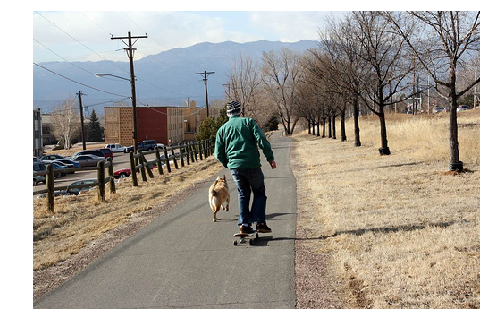

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()